# Integrantes

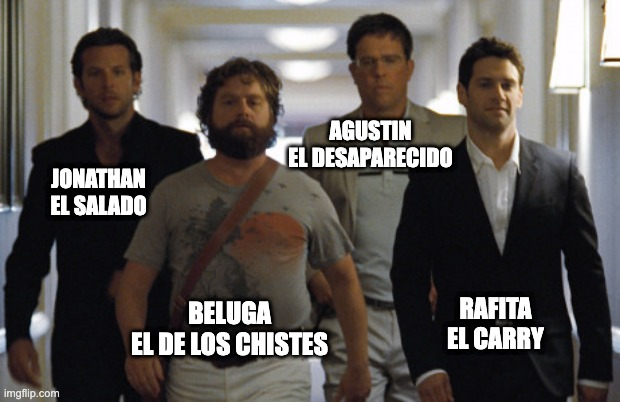

# Tarea

* Realizar un modelo de clasificación de texto, entrenando un modelo basado en una etiqueta (label) extraído de 1) la columna "search_hashtags" así como 2) los tópicos de la Parte2, en el dataset. 
* Utilizar de forma obligatoria un clasificador Multinomial de Naive Bayes (MultinomialNB) y al menos otro clasificador como LinearSVC, RandomForest, Regresión Logistica, etc.
* Realice la comparación de acuerdo con las métricas de evaluación de modelos precision/recall/f1-score.

* De manera opcional, realice sobre cada uno de los tuits un análisis de sentimientos utilizando librerías pre-entrenadas como TextBlob o Vader.

# Configuraciones

Configuraciones base.

Importamos las librerías a usar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

Montamos Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Utilidades

Funciones usadas en múltiples lugares

Calcular los scores comparanto labels y predicción

In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def score_results(y_test, y_predict):
  print("Accuracy score is", accuracy_score(y_test, y_predict))
  # see https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score
  # see https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
  extra_arguments = { 'average': 'weighted', 'labels': np.unique(y_predict) }
  print("F1 score is", f1_score(y_test, y_predict, **extra_arguments))
  print("Precision score is", precision_score(y_test, y_predict, **extra_arguments))
  print("Recall score is", recall_score(y_test, y_predict, **extra_arguments))


Generamos el CountVectorizer que usaremos para todos los modelos

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def get_vectorizer():
  my_stopwords = stopwords.words('english') + stopwords.words('spanish')
  return CountVectorizer(stop_words=my_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Hashtags

Cargamos el dataset. Usar la primer opción si estamos de afán

In [5]:
# Execute this one if you are in a hurry
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData.csv', sep=';')
df = df.sample(500)

In [6]:
# Execute this one if you have time to waste
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData.csv', sep=';')

In [7]:
df[:1]

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"


## Preparación ML

Preparación para ML, separación de datasets

Columna de entrada (X) y columna de salida (y) 

In [8]:
X = df['text']
y = df['search_hashtags']

Separamos nuestro dataset en training y test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Naive Bayes

Entrenamos el modelo Multinomial NB para predecir los search hashtags

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
* https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/bayes.ipynb#scrollTo=DmEUXgDYALmr


Entrenamos nuestro modelo

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(
  get_vectorizer(),
  MultinomialNB()
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('multinomialnb', MultinomialNB())])

Evaluamos el modelo entrenado

In [11]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.6619556210293711
F1 score is 0.6392907586106913
Precision score is 0.6910194317763034
Recall score is 0.6619556210293711


## Random Forest

Entrenamos el modelo Random Forest para predecir los search hashtags

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Entrenamos nuestro modelo. Limitamos el `max_depth` a 15 debido a que aumenta mucho el tiempo de cómputo cuando se deja unbounded

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# increasing depth does the job but is really expensive, for small sample you can increase it freely
# see https://stackoverflow.com/questions/34997134/random-forest-tuning-tree-depth-and-number-of-trees
model = make_pipeline(
  get_vectorizer(),
  RandomForestClassifier(max_depth=20, n_jobs=10)
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_jobs=10))])

Evaluamos el modelo entrenado

In [13]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.4719639075591566
F1 score is 0.3649003529991709
Precision score is 0.6432246511613475
Recall score is 0.48802780025705716


## Logistic Regression

Entrenamos el modelo Logistic Regression para predecir los search hashtags

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
  get_vectorizer(),
  LogisticRegression(max_iter=200, n_jobs=10)
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('logisticregression',
                 LogisticRegression(max_iter=200, n_jobs=10))])

Evaluamos el modelo entrenado

In [15]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.8135070435503177
F1 score is 0.8110319294668616
Precision score is 0.8118440571689376
Recall score is 0.8135070435503177


# Topicos

Cargamos el dataset. Usar la primer opción si estamos de afán

In [16]:
# Execute this one if you are in a hurry
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData-topics.csv', sep=',')
df = df.sample(500)

In [17]:
# Execute this one if you have time to waste
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData-topics.csv', sep=',')

In [18]:
df[:1]

,author_id,text,permalink,hashtags,search_hashtags,tokens_text_twit,topicstwit
0,7.590000e+17,"2020 is the year we #votethemout, the year we ...",https://twitter.com/Sphiamia/status/1211807074...,#votethemout #climatestrike #rebelforlife,#climatestrike,"['2020', 'year', '#votethemout', 'year', '#cli...","(1, 0.8984116)"


## Preparación ML

Preparación para ML, separación de datasets

Columna de entrada (X) y columna de salida (y) 

In [19]:
# We had to do this because the CSV with the tags had a pair (Topic, Probability)
def extract_topic(topicstwit):
  topic_part, rest = topicstwit.split(',')
  topic_part = topic_part.replace('(', '')
  return 'Topic ' + topic_part

In [20]:
X = df['text']
y = df['topicstwit'].map(extract_topic)

Separamos nuestro dataset en training y test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Naive Bayes

Entrenamos el modelo Multinomial NB para predecir los topicos

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
* https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/bayes.ipynb#scrollTo=DmEUXgDYALmr


Entrenamos nuestro modelo

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(
  get_vectorizer(),
  MultinomialNB()
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('multinomialnb', MultinomialNB())])

Evaluamos el modelo entrenado

In [23]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.6588633381672536
F1 score is 0.6380387781731048
Precision score is 0.7263083710236169
Recall score is 0.6588633381672536


## Random Forest

Entrenamos el modelo Random Forest para predecir los topicos

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Entrenamos nuestro modelo. Limitamos el `max_depth` a 15 debido a que aumenta mucho el tiempo de cómputo cuando se deja unbounded

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# increasing depth does the job but is really expensive, for small sample you can increase it freely
# see https://stackoverflow.com/questions/34997134/random-forest-tuning-tree-depth-and-number-of-trees
model = make_pipeline(
  get_vectorizer(),
  RandomForestClassifier(max_depth=20, n_jobs=10)
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_jobs=10))])

Evaluamos el modelo entrenado

In [25]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.32456322077204613
F1 score is 0.26272150596267385
Precision score is 0.7579122858272306
Recall score is 0.32456322077204613


## Logistic Regression

Entrenamos el modelo Logistic Regression para predecir los topicos

Referencias:

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
  get_vectorizer(),
  LogisticRegression(max_iter=200, n_jobs=10)
)

model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('logisticregression',
                 LogisticRegression(max_iter=200, n_jobs=10))])

Evaluamos el modelo entrenado

In [27]:
y_predict = model.predict(X_test)
score_results(y_test, y_predict)

Accuracy score is 0.8184517643809129
F1 score is 0.8175562508736114
Precision score is 0.8203768539337258
Recall score is 0.8184517643809129


# Conclusiones

* Naive Bayes presenta un comportamiento bastante estable. En general, a más datos, mejores resultados, la exigencia computacional es bastante predecible.
* Random Forest es computacionalmente muy exigente e impredecible debido a que solo da buenos resultados después de cierta profundidad del árbol cuando hay muchos datos.
* La regresión logística da buenos resultados y es bastante predecible en cuando a tiempos de entrenamiento.



# Sentimientos

Realizamos análisis de sentimientos usando Vader

Referencias:

* https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [28]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 2.1 MB/s 


## Análisis Tweets

Cargamos el dataset. Usar la primer opción si estamos de afán

In [31]:
# Execute this one if you are in a hurry
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData.csv', sep=';')
df = df.sample(500)

In [32]:
# Execute this one if you have time to waste
df = pd.read_csv('/content/gdrive/MyDrive/TwitterClimateData.csv', sep=';')

In [33]:
df[:1]

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"


Analizamos los sentimientos de los tweets con Vader

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_dict(text):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(text)

  conclusion = 'Neutral'
  if sentiment_dict['compound'] >= 0.05 :
    conclusion = 'Positive'
  elif sentiment_dict['compound'] <= -0.05:
    conclusion = 'Negative'

  sentiment_dict['conclusion'] = conclusion

  return sentiment_dict

def analyze_tweet_sentiments(text):
  sentiment_dict = get_sentiment_dict(text)
  return sentiment_dict['conclusion']

Agregamos la columna `sentiment` a un conjunto del dataframe (en este caso lo limitamos a 100 tweets) debido al costo computacional. 

In [35]:
sentiment_df = df[['id', 'text']].sample(100)
sentiment_df['sentiment'] = sentiment_df['text'].map(analyze_tweet_sentiments)
sentiment_df

,id,text,sentiment
50723,1.13184e+18,#goedemorgen Getting ready to speak to as many...,Positive
54845,1.20978e+18,When is this ultra privledged CHILD going back...,Neutral
48439,1.17389e+18,Conférence Jean Jouzel chez @orange ! Nous som...,Neutral
56053,1.1749e+18,Proud to see people holding the world in our h...,Positive
13434,1.19387e+18,The #sustainability advocate in me supports al...,Positive
...,...,...,...
36977,1.17494e+18,Der #Klimastreik in #Melbourne ist auch eine K...,Negative
19103,1.17516e+18,Heaven is under our feet as well as over our h...,Positive
16747,1.15005e+18,"#Save #tree , save #earth . Save #environment ...",Positive
50360,1.11084e+18,Inside the secret EU talks on the future of ca...,Positive
